<a href="https://colab.research.google.com/github/Jannatu37/machine-learning-/blob/main/Social_media_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 1. One-Sample T-Test

Goal: Test if the average total social media usage differs significantly from a hypothesized value (e.g., 2000 minutes/week).


We'll test:


H₀ (null hypothesis): Mean = 2000


H₁ (alternative): Mean ≠ 2000



Sample Mean: 2120.88
T-Statistic: 2.6765
P-Value: 0.0075
Result: Statistically significant difference from 2000 minutes/week.


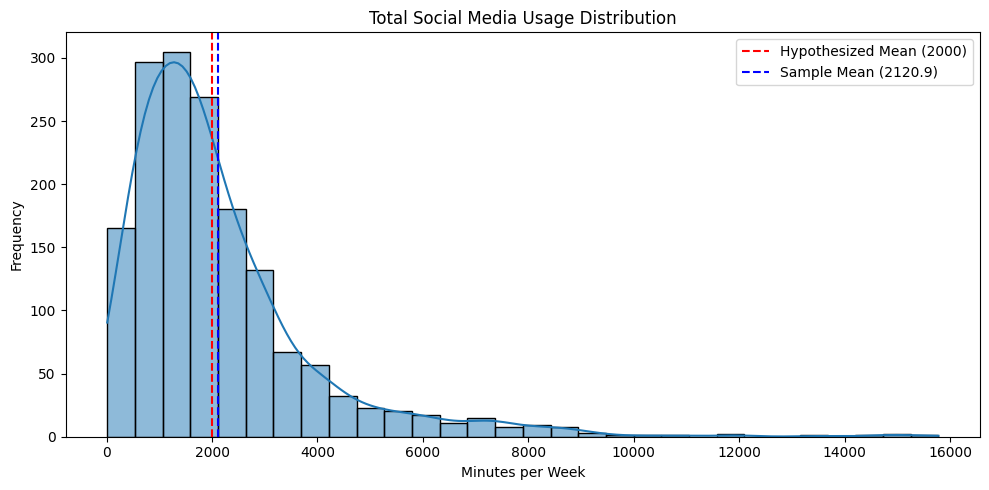

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("Social Media Usage India.csv")

# Clean numeric column (helper function)
def clean_numeric_column(series):
    return pd.to_numeric(series.astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Clean the specific column needed
df['Total Social Media Usage'] = clean_numeric_column(df['Total Social Media Usage'])

# Drop missing values
social_media_usage = df['Total Social Media Usage'].dropna()

# One-Sample T-Test
hypothesized_mean = 2000
t_stat, p_value = ttest_1samp(social_media_usage, hypothesized_mean)

# Print results
print(f"Sample Mean: {social_media_usage.mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Statistically significant difference from 2000 minutes/week.")
else:
    print("Result: No statistically significant difference from 2000 minutes/week.")

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(social_media_usage, bins=30, kde=True)
plt.axvline(hypothesized_mean, color='red', linestyle='--', label='Hypothesized Mean (2000)')
plt.axvline(social_media_usage.mean(), color='blue', linestyle='--', label=f'Sample Mean ({social_media_usage.mean():.1f})')
plt.title('Total Social Media Usage Distribution')
plt.xlabel('Minutes per Week')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()



🔹 Two-Sample T-Test

This test compares the mean total social media usage between Male and Female users.


H₀: Mean (Male) = Mean (Female)

H₁: Mean (Male) ≠ Mean (Female)

We also visualize it using a boxplot.

Mean (Male): 2025.20
Mean (Female): 2214.85
T-Statistic: -2.0993
P-Value: 0.0359
Result: Statistically significant difference in social media usage between genders.


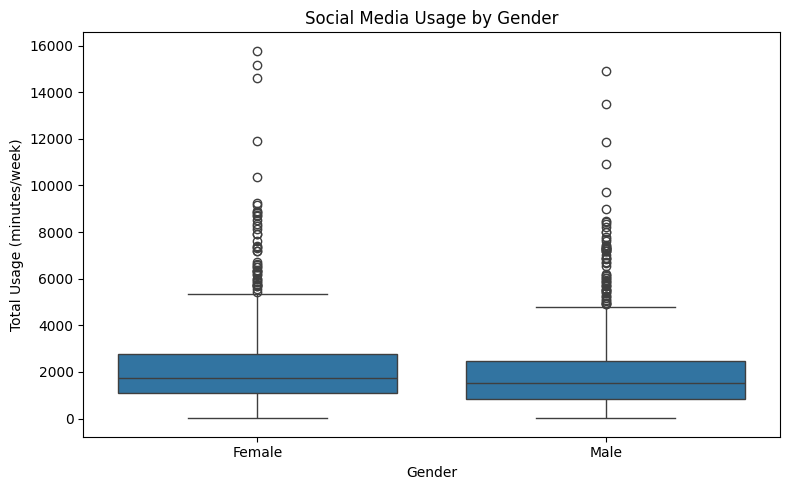

In [ ]:
from scipy.stats import ttest_ind

# Clean gender column and social media usage
df['Total Social Media Usage'] = clean_numeric_column(df['Total Social Media Usage'])
df = df[df['Gender'].isin(['Male', 'Female'])]  # filter only Male and Female

# Create two groups
male_usage = df[df['Gender'] == 'Male']['Total Social Media Usage'].dropna()
female_usage = df[df['Gender'] == 'Female']['Total Social Media Usage'].dropna()

# Perform Two-Sample T-Test (independent samples)
t_stat, p_value = ttest_ind(male_usage, female_usage, equal_var=False)  # Welch’s t-test

# Print results
print(f"Mean (Male): {male_usage.mean():.2f}")
print(f"Mean (Female): {female_usage.mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Statistically significant difference in social media usage between genders.")
else:
    print("Result: No statistically significant difference between genders.")

# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Total Social Media Usage', data=df)
plt.title("Social Media Usage by Gender")
plt.ylabel("Total Usage (minutes/week)")
plt.tight_layout()
plt.show()



🔹 Chi-Square Test

This test checks whether there's a relationship between two categorical variables: Gender and Phone OS.


H₀: Gender and Phone OS are independent

H₁: Gender and Phone OS are associated

We use a heatmap to visualize the count data.


Contingency Table:
Phone OS  Android  Others  iOs
Gender                        
Female        539       2  272
Male          575       3  235

Chi-Square Statistic: 4.063572463075294
Degrees of Freedom: 2
P-Value: 0.13110113489498318
Result: No statistically significant association between Gender and Phone OS.


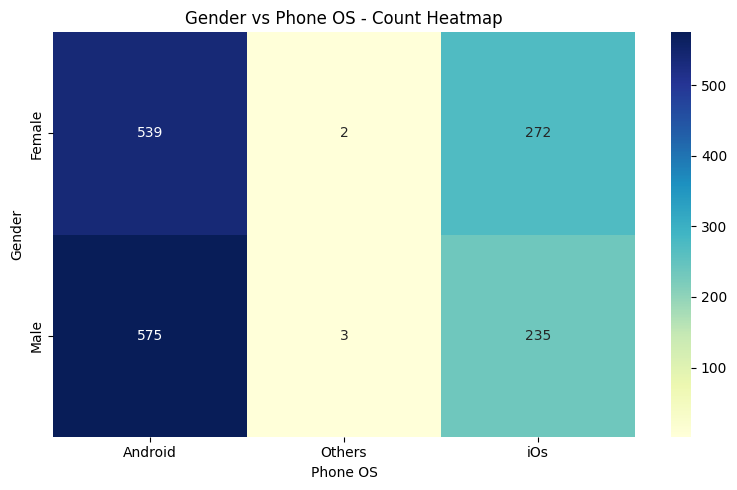

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Phone OS'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Result: Statistically significant association between Gender and Phone OS.")
else:
    print("Result: No statistically significant association between Gender and Phone OS.")

# Visualization
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Gender vs Phone OS - Count Heatmap')
plt.xlabel('Phone OS')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()



🔹 Kolmogorov-Smirnov (KS) Test

This test checks if the distributions of social media usage for Male and Female users are the same.


H₀: Distributions are the same

H₁: Distributions are different

We use an ECDF plot to visualize the distribution difference.




KS Statistic: 0.0959
P-Value: 0.0011
Result: Distributions of usage are significantly different between genders.


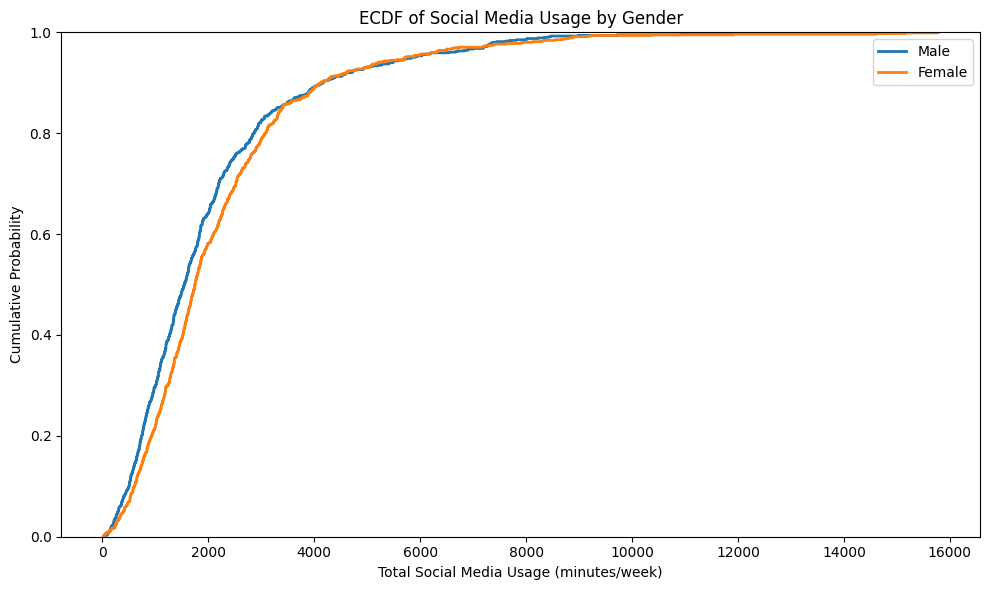

In [ ]:
from scipy.stats import ks_2samp

# Extract usage data for both genders
male_usage = df[df['Gender'] == 'Male']['Total Social Media Usage'].dropna()
female_usage = df[df['Gender'] == 'Female']['Total Social Media Usage'].dropna()

# Perform KS Test
ks_stat, p_value = ks_2samp(male_usage, female_usage)

# Print results
print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Distributions of usage are significantly different between genders.")
else:
    print("Result: No significant difference in distribution between genders.")

# Visualization: ECDFs
plt.figure(figsize=(10, 6))
sns.ecdfplot(male_usage, label='Male', linewidth=2)
sns.ecdfplot(female_usage, label='Female', linewidth=2)
plt.title('ECDF of Social Media Usage by Gender')
plt.xlabel('Total Social Media Usage (minutes/week)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.show()
